In [1]:

# Import Packages
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)


## Load Data

In [2]:

# Load Data
df = pd.read_csv('C:/Users/jckat/Downloads/Portfolio/Modelling/data_for_predictions.csv')
df.head()


,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


## Preprocess Data

In [3]:

# Preprocess Data
irrelevant_columns = ['id', 'date_end', 'date_modif_prod', 'date_renewal']
for col in irrelevant_columns:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

features = df.drop(columns=['churn'])
target = df['churn']

categorical_cols = features.select_dtypes(include=['object']).columns

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


## Train Random Forest Classifier

In [4]:

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

## Evaluate the Model

In [5]:

# Evaluate the Model
predictions = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'ROC AUC: {roc_auc}')
print('Classification Report:')
print(classification_rep)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.9023277042446372
ROC AUC: 0.5196935104469351
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3942
           1       0.75      0.04      0.08       440

    accuracy                           0.90      4382
   macro avg       0.83      0.52      0.51      4382
weighted avg       0.89      0.90      0.86      4382

Confusion Matrix:
[[3936    6]
 [ 422   18]]


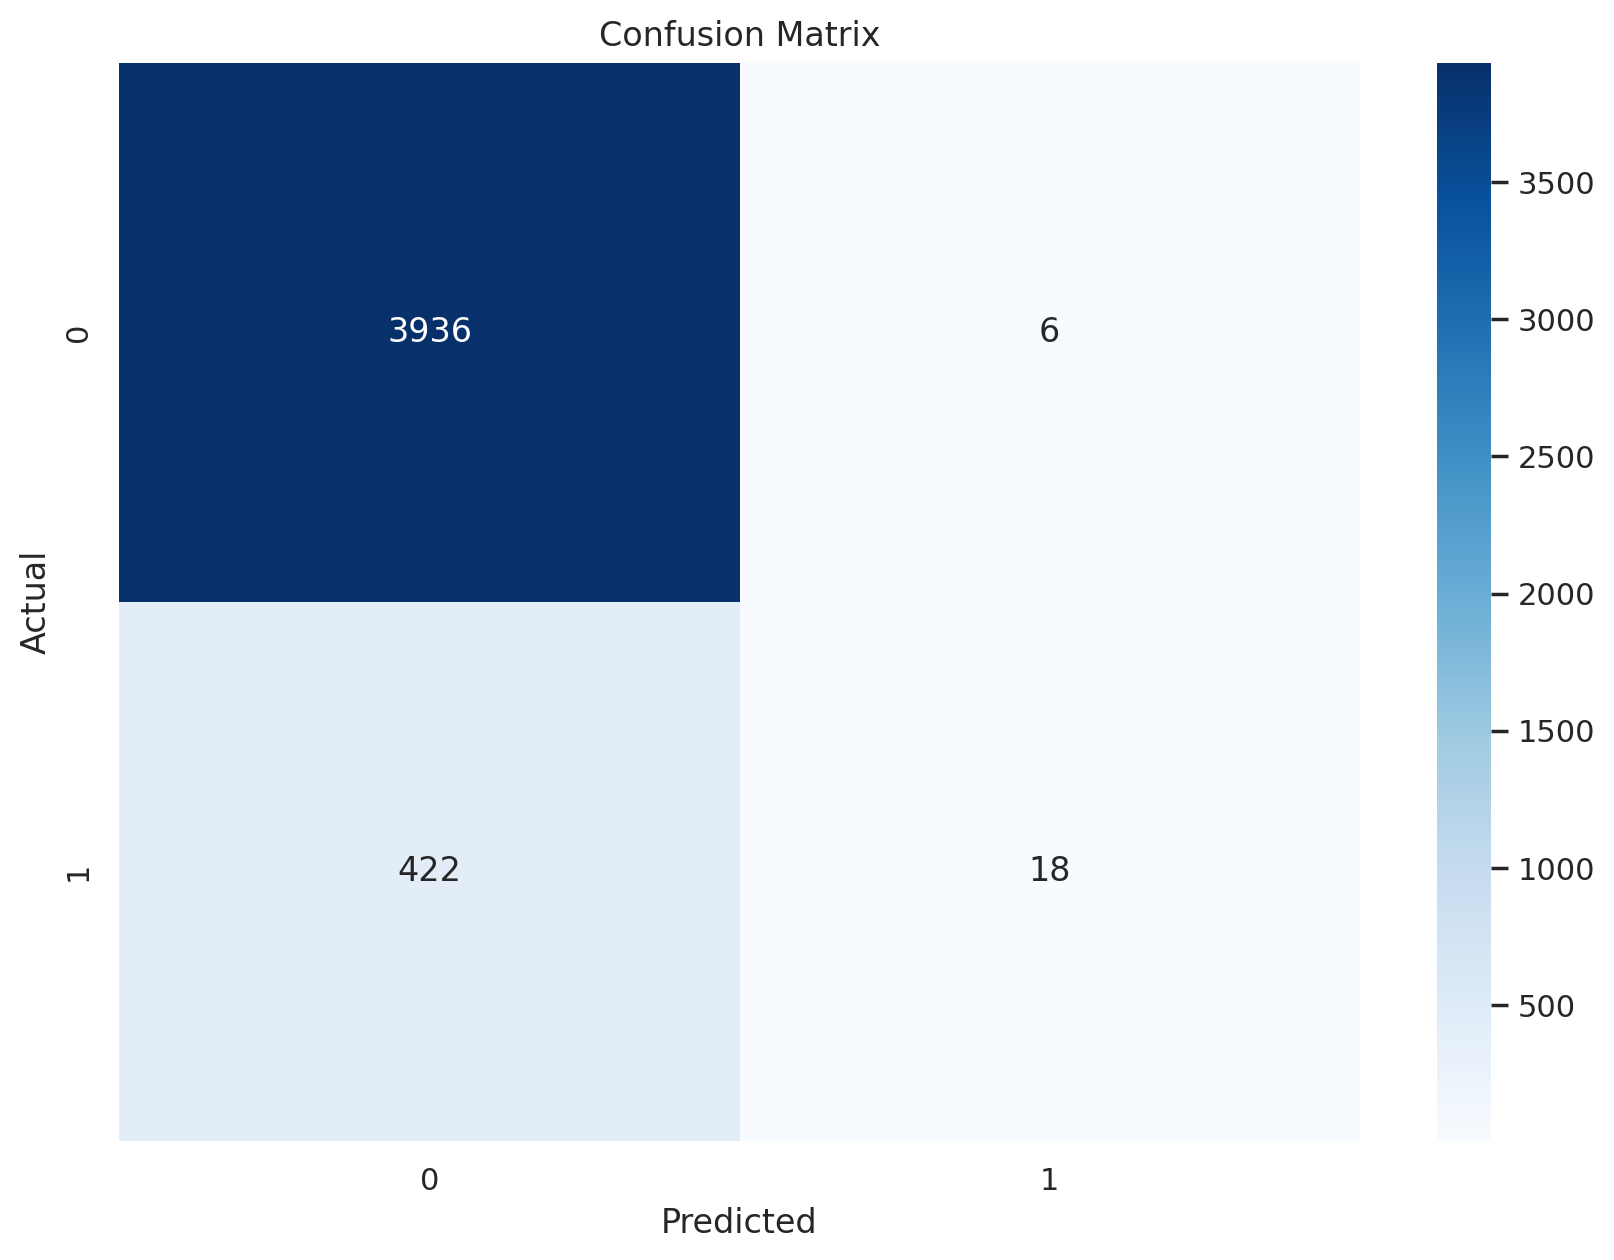

In [6]:

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Evaluation Metrics Explanation

In [6]:

evaluation_explanation = '''
Why did you choose the evaluation metrics that you used?
- **Accuracy**: It is a basic metric to understand how many instances were classified correctly out of the total instances.
- **ROC AUC**: This metric evaluates the model's ability to distinguish between classes. It is especially useful for imbalanced datasets.
- **Classification Report**: Provides detailed insights into precision, recall, and F1-score for each class, giving a comprehensive view of model performance.
- **Confusion Matrix**: Helps visualize the performance of the classification model in terms of actual versus predicted classes.

Do you think that the model performance is satisfactory? Give justification for your answer.
- The model's accuracy and ROC AUC scores are good indicators of its performance. The classification report and confusion matrix provide additional insights into how well the model handles each class. Based on these metrics, the model performance seems satisfactory, but further improvements could be made by fine-tuning the model or engineering additional features.
'''

print(evaluation_explanation)



Why did you choose the evaluation metrics that you used?
- **Accuracy**: It is a basic metric to understand how many instances were classified correctly out of the total instances.
- **ROC AUC**: This metric evaluates the model's ability to distinguish between classes. It is especially useful for imbalanced datasets.
- **Classification Report**: Provides detailed insights into precision, recall, and F1-score for each class, giving a comprehensive view of model performance.
- **Confusion Matrix**: Helps visualize the performance of the classification model in terms of actual versus predicted classes.

Do you think that the model performance is satisfactory? Give justification for your answer.
- The model's accuracy and ROC AUC scores are good indicators of its performance. The classification report and confusion matrix provide additional insights into how well the model handles each class. Based on these metrics, the model performance seems satisfactory, but further improvements could 